#Backtesting Fundos Imobiliários



# 1. Importando bibliotecas

In [ ]:
!pip install yfinance
!pip install git+https://github.com/quantopian/pyfolio
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-if3hyxv7
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-if3hyxv7


In [ ]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

# 2. Obtendo e tratando os dados

In [ ]:


tickers = ['SDIL11.SA', 'EURO11.SA', 'DIVO11.SA', 'VILG11.SA','CARE11.SA']
dados_yahoo = yf.download(tickers,start="2019-01-01", end="2019-12-31")['Close']


[*********************100%***********************]  5 of 5 completed


In [ ]:
dados_yahoo

,CARE11.SA,DIVO11.SA,EURO11.SA,SDIL11.SA,VILG11.SA
Date,,,,,
2019-01-02,1.67,49.450001,171.500000,105.370003,NaN
2019-01-03,1.68,49.590000,162.509995,105.930000,NaN
2019-01-04,1.68,49.790001,162.119995,105.989998,NaN
2019-01-07,1.66,49.250000,161.000000,106.000000,NaN
2019-01-08,1.66,49.450001,163.000000,105.800003,NaN
...,...,...,...,...,...
2019-12-20,1.24,67.349998,195.000000,132.000000,134.649994
2019-12-23,1.30,68.150002,195.000000,137.000000,139.990005
2019-12-26,1.37,69.620003,198.800003,142.699997,142.850006


In [ ]:
retorno = dados_yahoo.pct_change()
retorno

,CARE11.SA,DIVO11.SA,EURO11.SA,SDIL11.SA,VILG11.SA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.005988,0.002831,-0.052420,0.005315,NaN
2019-01-04,0.000000,0.004033,-0.002400,0.000566,NaN
2019-01-07,-0.011905,-0.010846,-0.006908,0.000094,NaN
2019-01-08,0.000000,0.004061,0.012422,-0.001887,NaN
...,...,...,...,...,...
2019-12-20,0.008130,0.002232,0.000000,0.056000,0.004776
2019-12-23,0.048387,0.011878,0.000000,0.037879,0.039658
2019-12-26,0.053846,0.021570,0.019487,0.041606,0.020430


In [ ]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,CARE11.SA,DIVO11.SA,EURO11.SA,SDIL11.SA,VILG11.SA
Date,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,1.005988,1.002831,0.947580,1.005315,NaN
2019-01-04,1.005988,1.006876,0.945306,1.005884,NaN
2019-01-07,0.994012,0.995955,0.938776,1.005979,NaN
2019-01-08,0.994012,1.000000,0.950437,1.004081,NaN
...,...,...,...,...,...
2019-12-20,0.742515,1.361982,1.137026,1.252728,1.213063
2019-12-23,0.778443,1.378160,1.137026,1.300180,1.261171
2019-12-26,0.820359,1.407887,1.159184,1.354275,1.286937


In [ ]:
carteira = 10000 * retorno_acumulado.iloc[:,1:5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,DIVO11.SA,EURO11.SA,SDIL11.SA,VILG11.SA,saldo,retorno
Date,,,,,,
2019-01-02,10000.000000,10000.000000,10000.000000,10000.000000,40000.000000,NaN
2019-01-03,10028.311302,9475.801429,10053.145824,NaN,29557.258554,-0.261069
2019-01-04,10068.756349,9453.060940,10058.839812,NaN,29580.657101,0.000792
2019-01-07,9959.554953,9387.755102,10059.789052,NaN,29407.099106,-0.005867
2019-01-08,10000.000000,9504.373178,10040.808607,NaN,29545.181785,0.004696
...,...,...,...,...,...,...
2019-12-20,13619.817479,11370.262391,12527.284479,12130.630081,49647.994430,0.015386
2019-12-23,13781.597669,11370.262391,13001.802831,12611.712207,50765.375097,0.022506
2019-12-26,14078.867881,11591.836913,13542.753462,12869.369919,52082.828175,0.025952


# 3. Resultados

Start date,2019-01-02
End date,2019-12-30
Total months,11
,Backtest
Annual return,-23.075%
Cumulative returns,-22.754%
Annual volatility,60.045%
Sharpe ratio,-0.15
Calmar ratio,-0.56
Stability,0.61
Max drawdown,-41.341%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,41.34,2019-06-28,2019-11-29,NaT,NaN
1,28.00,2019-01-31,2019-06-24,2019-06-28,107
2,5.29,2019-01-11,2019-01-24,2019-01-31,15
3,2.98,2019-01-04,2019-01-09,2019-01-11,6
4,NaN,NaT,NaT,NaT,NaN


Stress Events,mean,min,max
New Normal,-0.04%,-11.76%,19.33%


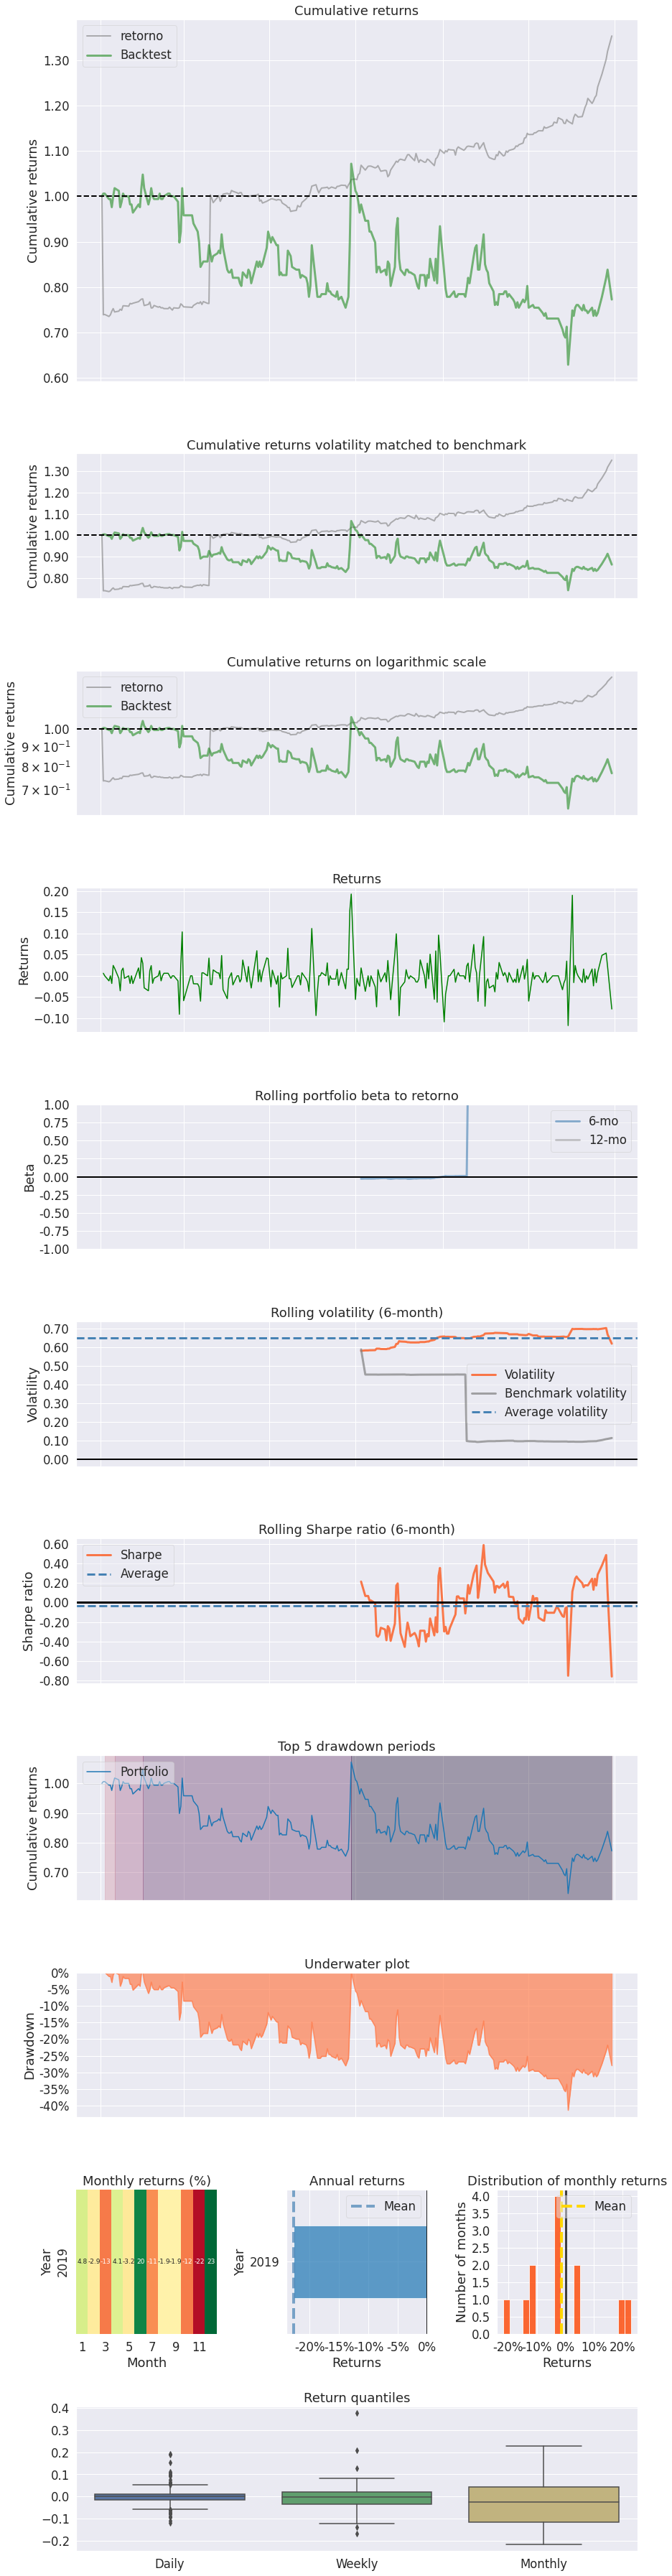

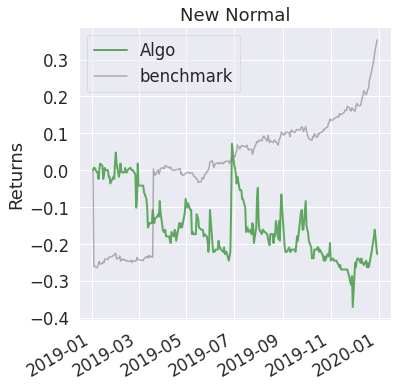

In [ ]:
pf.create_full_tear_sheet(retorno["CARE11.SA"], benchmark_rets=carteira["retorno"])


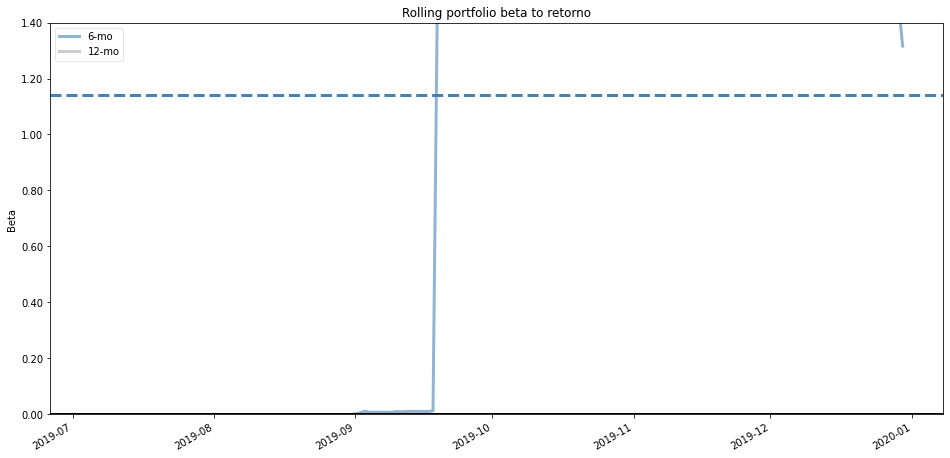

In [ ]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(retorno["CARE11.SA"],factor_returns=carteira["retorno"], ax=ax1)
plt.ylim((0.0, 1.4));

#Datapane


In [ ]:
!pip install datapane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import datapane as dp

